In [1]:
# Import some necessary libraries
import numpy as np 
import os
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
# Declare some variables about the paths and files
data_dir = "D:\\FGW\\GDRIVE\\My BI\\Data"
excel_name = "Gold_price_forecast.xlsx"
#excel_path = data_dir + "\\" + excel_name
excel_path = os.path.join(data_dir, excel_name)

In [3]:
# Read the excel file to a dataframe
excel_df = pd.read_excel(excel_path, usecols=["Date", "Price (USD)"])

In [4]:
excel_df

,Date,Price (USD)
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [12]:
# Prepare the array data for our model
# reshape((-1, 1)) to vectorise an array (vector is an one column matrix)
y_array = np.array(excel_df["Price (USD)"]).reshape((-1,1))
x_array = np.array(range(1, len(y_array)+1)).reshape((-1,1))

In [15]:
# define the model of machine learning 
model = LinearRegression()

In [16]:
# Train the model with the whole data
model.fit(x_array, y_array)


LinearRegression()

In [17]:
# predict with some data
y_predict = model.predict(x_array)

In [23]:
ml_lr = list(y_predict)
pre_data = [item[0] for item in ml_lr]
"""
pre_data = []
for item in ml_lr:
    pre_data.append(item[0])
"""

In [24]:
# append the predict data into dataframe
excel_df["ML Linear Regression"] = pre_data

In [25]:
excel_df

,Date,Price (USD),ML Linear Regression
0,1950-01,34.730,-237.858616
1,1950-02,34.730,-236.311534
2,1950-03,34.730,-234.764453
3,1950-04,34.730,-233.217371
4,1950-05,34.730,-231.670289
...,...,...,...
842,2020-03,1593.764,1064.784100
843,2020-04,1680.030,1066.331182
844,2020-05,1715.697,1067.878264
845,2020-06,1734.032,1069.425345


<AxesSubplot:>

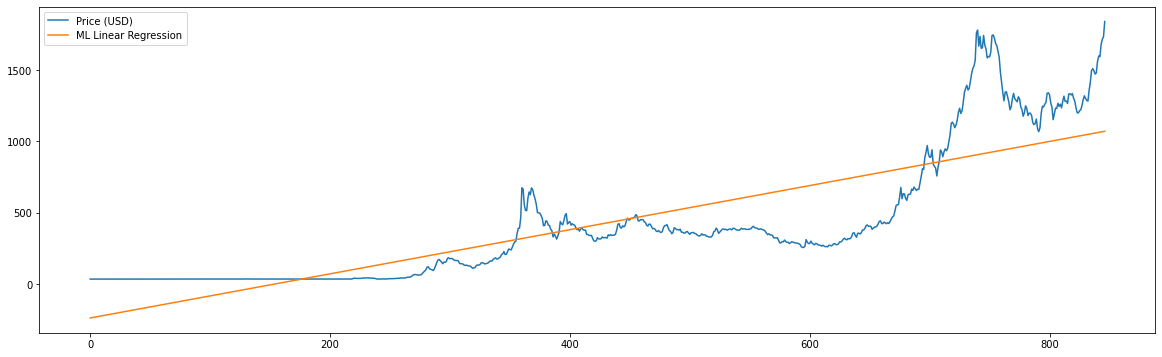

In [27]:
excel_df.plot(figsize=(20,6))

In [47]:
# define a function to apply the model in a short period (with num_steps)
def linear_predict(x_predict, y_known, x_known):
    model = LinearRegression()
    model.fit(x_known, y_known)
    y_predict = model.predict(x_predict)
    return y_predict

In [48]:
# Create the forecast data 
num_steps = 15
forecast_data = list(excel_df["Price (USD)"][:num_steps])
for i in range(num_steps, len(x_array)):
    x_predict = x_array[i].reshape((-1,1))
    x_known = x_array[i-num_steps : i]
    y_known = y_array[i-num_steps : i]
    y_predict = linear_predict(x_predict, y_known, x_known)
    forecast_data.append(y_predict[0][0])

In [44]:
excel_df["Forecast LR"] = list(forecast_data)

In [45]:
excel_df

,Date,Price (USD),ML Linear Regression,Forecast LR
0,1950-01,34.730,-237.858616,34.730000
1,1950-02,34.730,-236.311534,34.730000
2,1950-03,34.730,-234.764453,34.730000
3,1950-04,34.730,-233.217371,34.730000
4,1950-05,34.730,-231.670289,34.730000
...,...,...,...,...
842,2020-03,1593.764,1064.784100,1600.950971
843,2020-04,1680.030,1066.331182,1624.877305
844,2020-05,1715.697,1067.878264,1668.741238
845,2020-06,1734.032,1069.425345,1715.572800


<AxesSubplot:>

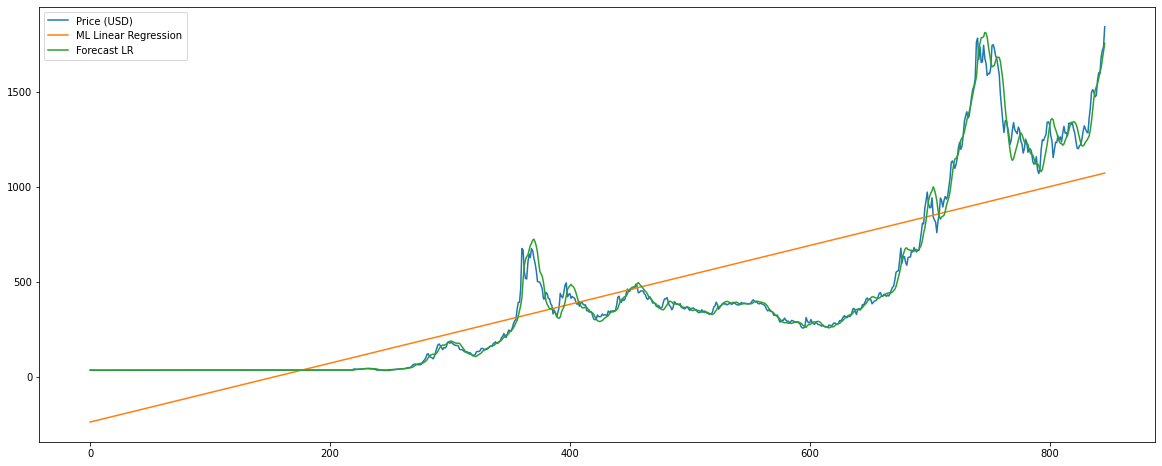

In [46]:
excel_df.plot(figsize=(20,8))